In [1]:
print("ELEVATE LABS TASK 6")

ELEVATE LABS TASK 6


C:\Users\SAICHARAN\AppData\Local\Temp\ipykernel_3224\1980535172.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age']=df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\SAICHARAN\AppData\Local\Temp\ipykernel_3224\1980535172.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Survived      0
Pclass        0
Sex           0
Age         891
SibSp         0
Parch         0
Fare          0
Embarked    891
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  488 non-null    int64  
 1   Pclass    488 non-null    int64  
 2   Sex       488 non-null    int64  
 3   Age       0 non-null      float64
 4   SibSp     488 non-null    float64
 5   Parch     488 non-null    float64
 6   Fare      488 non-null    float64
 7   Embarked  488 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 34.3 KB


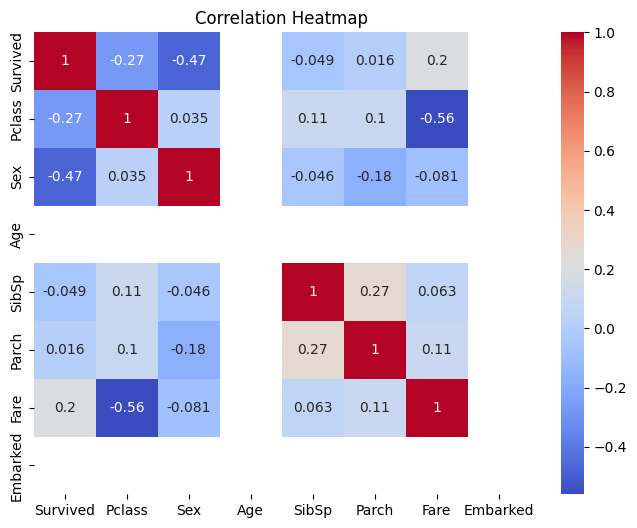

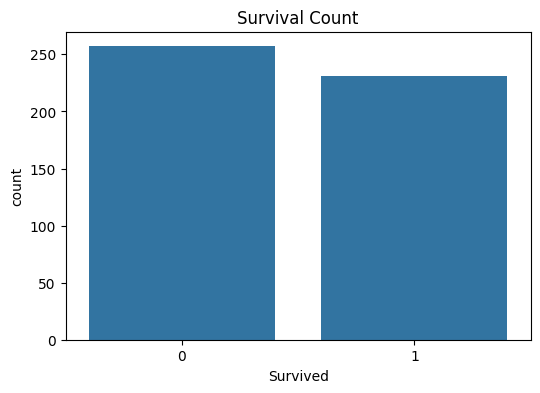

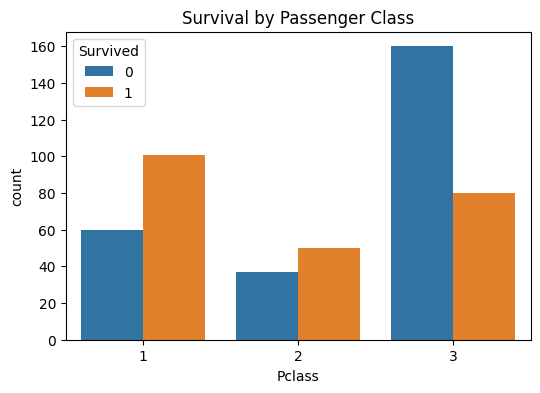

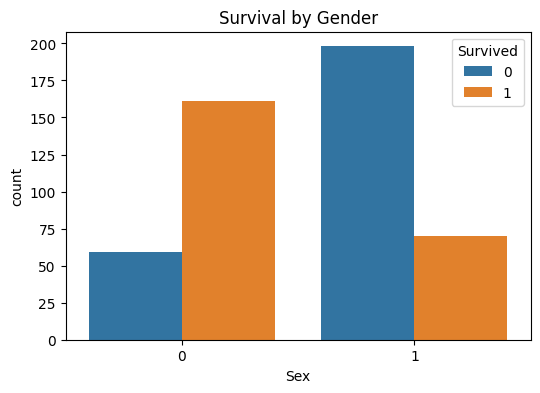

         Survived      Pclass         Sex  Age         SibSp         Parch  \
count  488.000000  488.000000  488.000000  0.0  4.880000e+02  4.880000e+02   
mean     0.473361    2.161885    0.549180  NaN  7.280151e-18  3.640075e-18   
std      0.499802    0.892831    0.498086  NaN  1.001026e+00  1.001026e+00   
min      0.000000    1.000000    0.000000  NaN -6.181689e-01 -5.743025e-01   
25%      0.000000    1.000000    0.000000  NaN -6.181689e-01 -5.743025e-01   
50%      0.000000    2.000000    1.000000  NaN -6.181689e-01 -5.743025e-01   
75%      1.000000    3.000000    1.000000  NaN  4.044291e-01  4.753590e-01   
max      1.000000    3.000000    1.000000  NaN  7.562615e+00  5.723666e+00   

               Fare  Embarked  
count  4.880000e+02     488.0  
mean   1.274026e-16       0.0  
std    1.001026e+00       0.0  
min   -7.016282e-01       0.0  
25%   -5.362829e-01       0.0  
50%   -3.149292e-01       0.0  
75%    1.327700e-01       0.0  
max    7.912164e+00       0.0  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

df=pd.read_csv("D:/elevate_labs/task 5/train.csv")

df.drop_duplicates()
df['Age']=df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 
df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)
remaining_nulls = df.isnull().sum()
print(remaining_nulls)

df.drop_duplicates(inplace=True)

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

scaler = StandardScaler()
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.info()
df.head()

summary=df.describe()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

print(summary)